<a href="https://colab.research.google.com/github/taxevader007/fingerPrintsAutenticator/blob/main/proyectoAPL2_Santiago_Haider_Sofia_Valentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matematicas aplicadas 2

Proyecto Final Matemáticas Aplicadas II

Santiago Espinosa, Haider Valencia, Valentina Arana y Sofia Romero

Identificación del Problema

Una empresa enfrenta desafíos en la seguridad del personal y activos, así como en el control de calidad y cumplimiento normativo. El acceso no autorizado al área de trabajo puede llevar a pérdidas significativas, tanto en términos de seguridad como de productividad. La falta de un sistema de control de acceso basado en reconocimiento de huellas dactilares aumenta el riesgo de intrusiones no autorizadas.

Objetivo General

Desarrollar un sistema de control de acceso basado en reconocimiento de huellas dactilares para una empresa, asegurando la seguridad del personal y activos, mejorando el control de calidad y cumpliendo con las normativas aplicables.


Objetivos Específicos

Diseño del sistema de reconocimiento de huellas dactilares: Crear un sistema que pueda capturar, procesar y comparar huellas dactilares de manera eficiente.

Implementación de la base de datos de huellas autorizadas: Establecer una base de datos que contenga las huellas dactilares de los empleados autorizados para acceder al área de trabajo.

Validación del sistema: Realizar pruebas para asegurar la precisión y seguridad del sistema de reconocimiento de huellas dactilares.














Formas de Resolución

Representación de Huellas Dactilares como Matrices o Vectores:
Matrices: Cada huella dactilar puede representarse como una matriz bidimensional, donde cada celda de la matriz corresponde a un punto en la huella dactilar. Los valores dentro de la matriz pueden representar características como la presencia de un punto de la huella dactilar (1) o su ausencia (0).

Vectores: Alternativamente, cada huella dactilar puede representarse como un vector, donde cada elemento del vector corresponde a una característica de la huella dactilar. Este enfoque puede ser más eficiente en términos de almacenamiento y procesamiento.

Comparación de Huellas Dactilares:
Distancia Euclidiana: Para comparar dos huellas dactilares, se puede calcular la distancia euclidiana entre los vectores que representan cada huella. Si la distancia es por debajo de un umbral predefinido, se considera que las huellas coinciden.
Similitud del Coseno: Otra opción es calcular la similitud del coseno entre los vectores de las huellas dactilares. Un valor cercano a 1 indica una alta similitud, lo que sugiere que las huellas coinciden.

Base de Datos de Huellas Autorizadas:
Estructura de Datos: Las huellas dactilares autorizadas se almacenan en una estructura de datos eficiente, como un árbol de búsqueda binaria o una tabla hash, para permitir búsquedas rápidas.

Implementación de la Base de Datos:
Seguridad: La base de datos de huellas dactilares debe estar protegida con medidas de seguridad robustas para prevenir el acceso no autorizado.

Validación del Sistema:
Pruebas Matemáticas: Se realizarán pruebas matemáticas para asegurar la precisión del sistema de reconocimiento de huellas dactilares. Esto incluye la comparación de huellas dactilares utilizando distancias y similitudes, así como la evaluación de la seguridad de la base de datos.


Conclusión

Al utilizar matrices, vectores o grafos para representar y comparar huellas dactilares, se puede desarrollar un sistema de control de acceso robusto y seguro. Este enfoque matemático permite una implementación eficiente y precisa del sistema de reconocimiento de huellas dactilares, mejorando significativamente la seguridad del personal y los activos de la empresa. Además, al implementar medidas de seguridad robustas en la base de datos de huellas dactilares, se asegura que solo los empleados autorizados puedan acceder al área de trabajo, contribuyendo a un ambiente de trabajo más seguro y productivo.




In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploades = files.upload()

Saving dedoscan.png to dedoscan.png


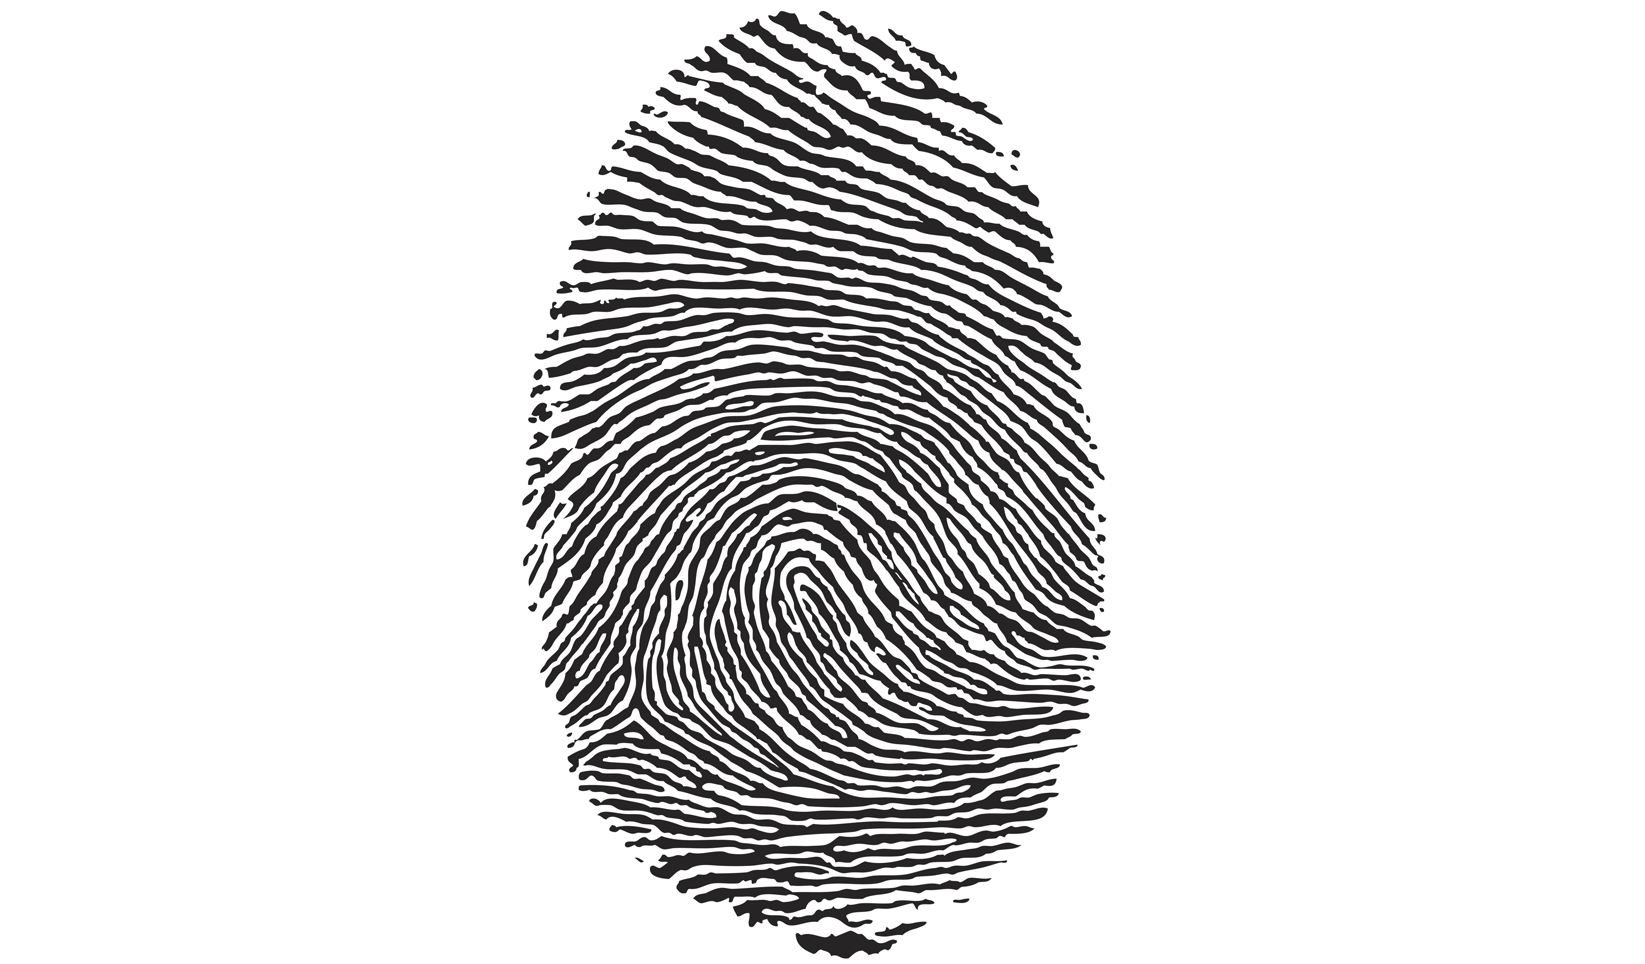

In [ ]:
Image('dedoscan.png',width= 400)

imagesOutput/escalagrisu.tif


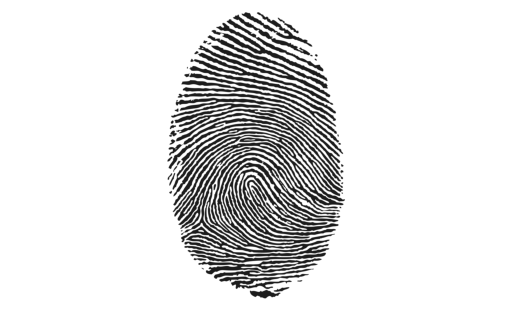

In [ ]:
from PIL import Image


import math

def escagris(img):
    arr = img.load()
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            arr[x,y] = img.getpixel((x,y))
    return arr
huella=Image.open("dedoscan.png").convert("L")
convirtiendo = escagris(huella)

import os

# Define the output folder
output_folder = "imagesOutput"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

huella.save(os.path.join(output_folder, "escalagrisu.tif"))

print(os.path.join(output_folder, "escalagrisu.tif")) #where ias the image

import matplotlib.pyplot as plt

image_path = os.path.join(output_folder, "escalagrisu.tif")
img = Image.open(image_path)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:

def binarizacion (img,umbral):
    arr = img.load()
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            p = img.getpixel((x,y))
            if p>umbral:
                arr[x,y] = 255
            else:
                arr[x,y] = 0
    return arr

huella=Image.open(os.path.join(output_folder, "escalagrisu.tif")).convert("L")
convirtiendo = binarizacion(huella, 128)
huella.save(os.path.join(output_folder, "binarizacion.tif"))
huella.show()


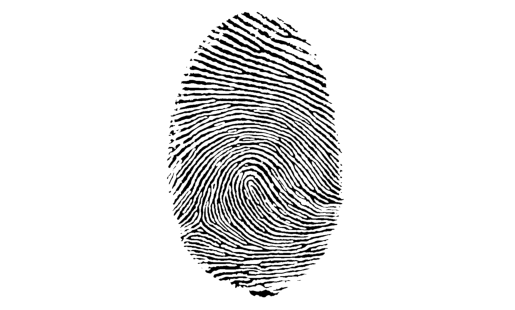

In [ ]:

def adelgazamiento(img,mascaraH,mascaraV):
    arr = img.load()

    Ha = mascaraH[0][0]
    Hb = mascaraH[0][1]
    Hc = mascaraH[0][2]
    Hd = mascaraH[1][0]
    He = mascaraH[1][1]
    Hf = mascaraH[1][2]
    Hg = mascaraH[2][0]
    Hh = mascaraH[2][1]
    Hi = mascaraH[2][2]

    Va = mascaraV[0][0]
    Vb = mascaraV[0][1]
    Vc = mascaraV[0][2]
    Vd = mascaraV[1][0]
    Ve = mascaraV[1][1]
    Vf = mascaraV[1][2]
    Vg = mascaraV[2][0]
    Vh = mascaraV[2][1]
    Vi = mascaraV[2][2]

    for x in range(1,img.size[0]-1):
        for y in range(1,img.size[1]-1):
            Ia = img.getpixel((x-1,y-1))
            Ib = img.getpixel((x-1,y))
            Ic = img.getpixel((x-1,y+1))
            Id = img.getpixel((x,y-1))
            Ie = img.getpixel((x,y))
            If = img.getpixel((x,y+1))
            Ig = img.getpixel((x+1,y-1))
            Ih = img.getpixel((x+1,y))
            Ii = img.getpixel((x+1,y+1))
            Gx = Ha*Ia+Hb*Ib+Hc*Ic+Hd*Id+He*Ie+Hf*If+Hg*Ig+Hh*Ih+Hi*Ii
            Gy = Va*Ia+Vb*Ib+Vc*Ic+Vd*Id+Ve*Ie+Vf*If+Vg*Ig+Vh*Ih+Vi*Ii
##            Gx = math.fabs(-Ia-Id-Ig+Ic+If+Ii)
##            Gy = math.fabs(-Ia-Ib-Ic+Ig+Ih+Ii)
            valor = math.sqrt(Gx*Gx+Gy*Gy)
            if valor>255.0:
                valor=255.0
            arr[x-1,y-1] = int(valor)
    return arr

img = Image.open(os.path.join(output_folder, "binarizacion.tif")).convert("L")
thiningX = [[0.0 ,0.0, 0.0],
            [0.0 ,1.0, 0.0],
            [1.0 ,1.0, 1.0],

            [1.0 ,0.0, 0.0],
            [1.0 ,1.0, 0.0],
            [1.0 ,0.0, 0.0],

            [1.0 ,1.0, 1.0],
            [0.0 ,1.0, 0.0],
            [0.0 ,0.0, 0.0],

            [0.0 ,0.0, 1.0],
            [0.0 ,1.0, 1.0],
            [0.0 ,0.0, 1.0]]


thiningY = [[0.0,  0.0,  0.0],
            [1.0,  1.0,  0.0],
            [0.0,  1.0,  0.0],

            [0.0 ,1.0, 0.0],
            [1.0 ,1.0, 0.0],
            [0.0 ,0.0, 0.0],

            [0.0 ,1.0, 0.0],
            [0.0 ,1.0, 1.0],
            [0.0 ,0.0, 0.0],

            [0.0 ,0.0, 0.0],
            [0.0 ,1.0, 1.0],
            [0.0 ,1.0, 0.0]]


I = adelgazamiento(img, thiningX, thiningY)
img.save(os.path.join(output_folder, "imgAdelgazada.tif"))
img.show()


def poda(img,mascaraH,mascaraV):
    arr = img.load()

    Ha = mascaraH[0][0]
    Hb = mascaraH[0][1]
    Hc = mascaraH[0][2]
    Hd = mascaraH[1][0]
    He = mascaraH[1][1]
    Hf = mascaraH[1][2]
    Hg = mascaraH[2][0]
    Hh = mascaraH[2][1]
    Hi = mascaraH[2][2]

    Va = mascaraV[0][0]
    Vb = mascaraV[0][1]
    Vc = mascaraV[0][2]
    Vd = mascaraV[1][0]
    Ve = mascaraV[1][1]
    Vf = mascaraV[1][2]
    Vg = mascaraV[2][0]
    Vh = mascaraV[2][1]
    Vi = mascaraV[2][2]

    for x in range(1,img.size[0]-1):
        for y in range(1,img.size[1]-1):
            Ia = img.getpixel((x-1,y-1))
            Ib = img.getpixel((x-1,y))
            Ic = img.getpixel((x-1,y+1))
            Id = img.getpixel((x,y-1))
            Ie = img.getpixel((x,y))
            If = img.getpixel((x,y+1))
            Ig = img.getpixel((x+1,y-1))
            Ih = img.getpixel((x+1,y))
            Ii = img.getpixel((x+1,y+1))
            Gx = Ha*Ia+Hb*Ib+Hc*Ic+Hd*Id+He*Ie+Hf*If+Hg*Ig+Hh*Ih+Hi*Ii
            Gy = Va*Ia+Vb*Ib+Vc*Ic+Vd*Id+Ve*Ie+Vf*If+Vg*Ig+Vh*Ih+Vi*Ii
##            Gx = math.fabs(-Ia-Id-Ig+Ic+If+Ii)
##            Gy = math.fabs(-Ia-Ib-Ic+Ig+Ih+Ii)
            valor = math.sqrt(Gx*Gx+Gy*Gy)
            if valor>255.0:
                valor=255.0
            arr[x-1,y-1] = int(valor)
    return arr

img = Image.open(os.path.join(output_folder, "imgAdelgazada.tif")).convert("L")
pruningX = [[0.0 ,0.0, 0.0],
            [0.0 ,1.0, 0.0],
            [0.0 ,0.0, 0.0]]


pruningY = [[0.0,  0.0,  0.0],
            [0.0,  1.0,  0.0],
            [0.0,  0.0,  0.0]]

# Apply pruning directly to the image
poda(img, pruningX, pruningY)

# Save the processed image
img.save(os.path.join(output_folder, "imgpoda.tif"))

# Display the processed image
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()